In [1]:
import urllib
import io, re
import numpy as np
import struct
import matplotlib.pyplot as plt

In [2]:
# Fetch online data
with urllib.request.urlopen('https://imos-data.aodn.org.au/IMOS/ANMN/Acoustic/PAPCA/3444/20161002/raw/57F04DF1.DAT') as f:
    data = f.readlines()

In [3]:
# Split binary file
header, body, footer = data[:5], data[5:-6], data[-6:]

# Fetch header info with # https://regex101.com/
header = [h.decode() for h in header]
match = re.match('Sample Rate ([0-9]*) Duration ([0-9]*)', header[2])
SampleRate = int(match.group(1))
Duration = int(match.group(2))
match = re.match('Schedule [0-9]* ([0-9]{4})\/([0-9]{2})\/([0-9]{1,2}) ([0-9:]*) - ([0-9]*)', header[1])
match.groups()

('2016', '10', '02', '00:00:01', '48836')

In [8]:
# Read binaries
list_of_bytes = [bytes(element) for element in body]
list_of_bytes = b'<\>'.join(list_of_bytes)

new_body = []
for i, l in enumerate(body):
    if len(l)%2 == 1:
        #print(l, i)
        l = l[:-1]
    string_formatter = '>' + ('H' * (len(l) // 2))
    temp = struct.unpack(string_formatter, l)
    new_body.extend(temp)
    
volts = np.array(new_body)
#n_channels = 1
#volts = np.array(volts).reshape(-1, n_channels)

In [9]:
#Convert to actual Volts
Fullscale = 5 #	0 to 5 V
#Multiply by this factor to convert A/D counts to volts 0-5
CountsToVolts = Fullscale / 65536 

Volts = (CountsToVolts * volts) - np.mean(volts * CountsToVolts)

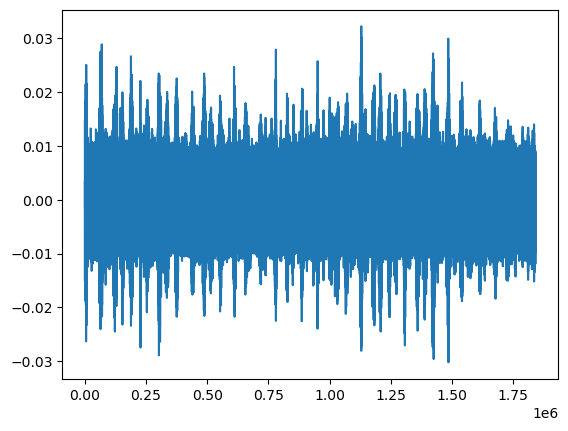

In [10]:
#Plot waveform in Volt
plt.plot(Volts)
#plt.scatter(np.arange(0, len(Volts)), Volts, alpha=0.1, s=1)

## Convert ts file to mp4

In [ ]:
from pydub import AudioSegment
import ffmpeg

In [11]:
ffmpeg.input(input_file).output(output_file).run()

NameError: name 'ffmpeg' is not defined

## Build spectrogram from wav file...

In [ ]:
from soundscape_IR.soundscape_viewer import audio_visualization

In [ ]:
spec = audio_visualization(filename='f_converted.wav', path='./data/archive-orcasound-net-lab/')